# Data Preprocessing
### Resampling Original Datset by Upsampling and Downsampling

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sb
import numpy as np

In [31]:
X = df_adj.drop('bp_category', axis = 1)
y = df_adj['bp_category']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (43667, 8) (43667,)
Test Set  : (10917, 8) (10917,)


In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

Text(0.5, 1.0, 'Original Data Distribution (Training Set)')

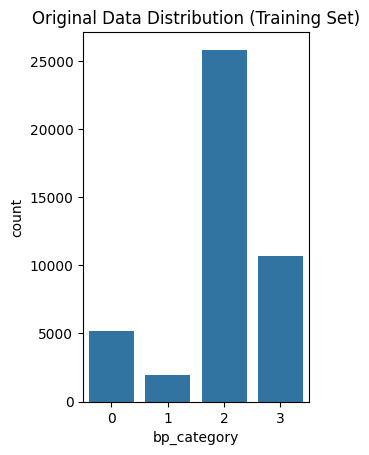

In [35]:
plt.subplot(1, 2, 1)
sb.countplot(x=y_train)
plt.title("Original Data Distribution (Training Set)")

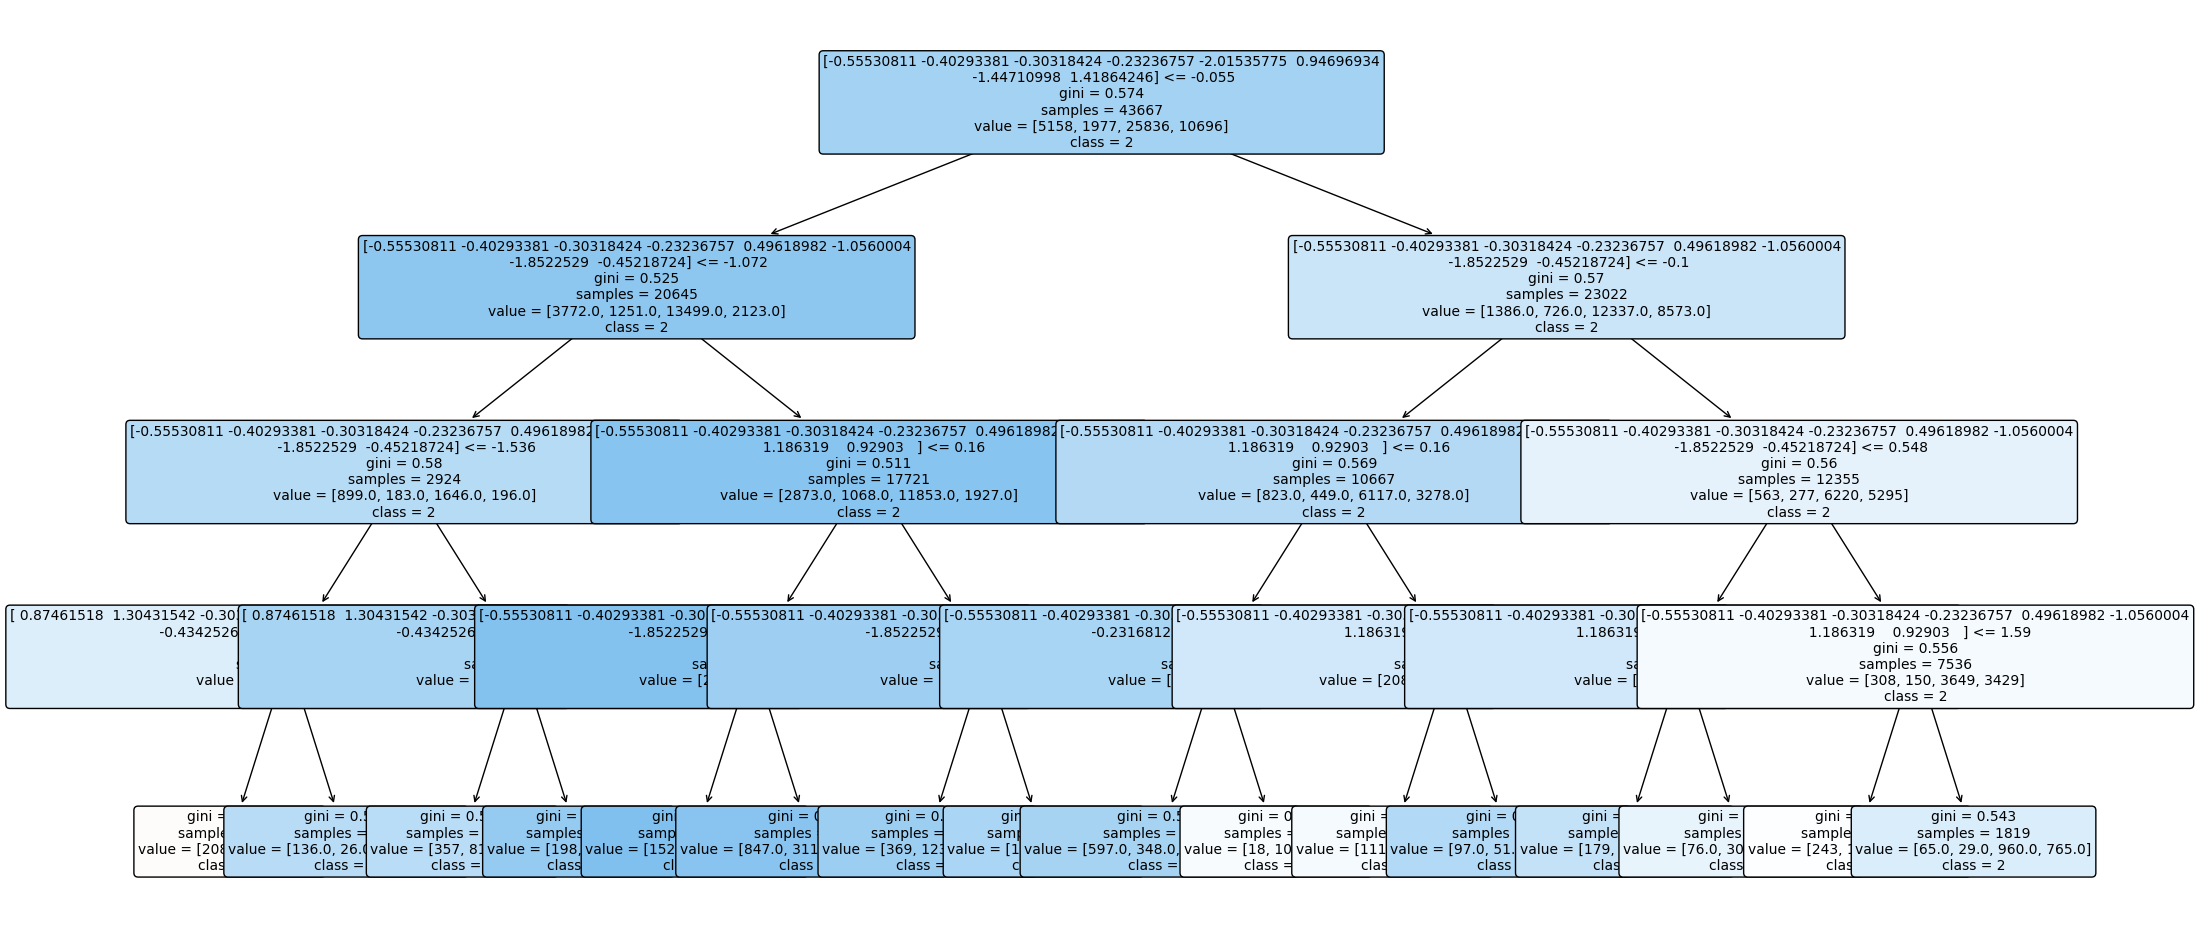

In [36]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=X_train,
          class_names=["0", "1", "2", "3"], fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)
plt.show()

Train Data
Accuracy  :	 0.5918199097716811



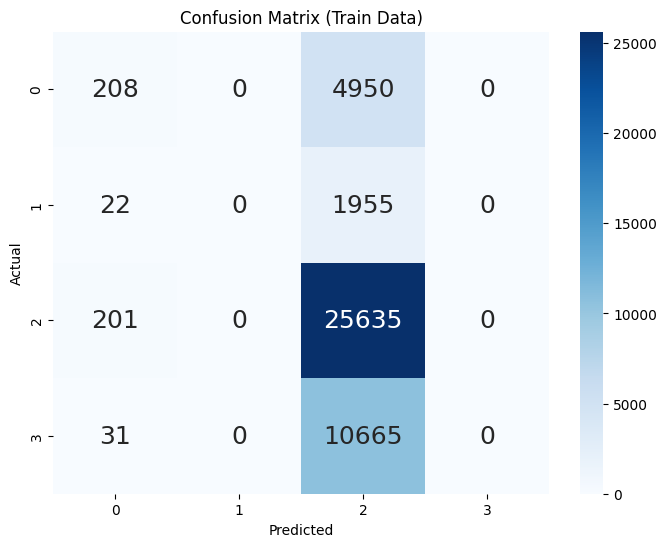

In [37]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cm_Train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Train, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Data)')
plt.show()

In [38]:
TP = np.diag(cm_Train)
FP = np.sum(cm_Train, axis=0) - TP
FN = np.sum(cm_Train, axis=1) - TP
TN = np.sum(np.sum(cm_Train)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.04032570763861962, TNR: 0.9934041392921136, FPR: 0.0065958607078864685, FNR: 0.9596742923613804
Class 1:
TPR: 0.0, TNR: 1.0, FPR: 0.0, FNR: 1.0
Class 2:
TPR: 0.9922201579191825, TNR: 0.014637429196343447, FPR: 0.9853625708036565, FNR: 0.007779842080817464
Class 3:
TPR: 0.0, TNR: 1.0, FPR: 0.0, FNR: 1.0


Train Data
Accuracy  :	 0.6003480809746268



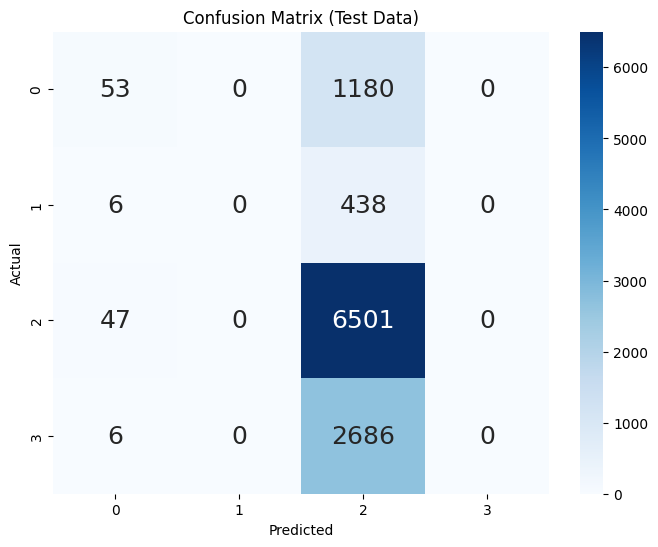

In [41]:
y_test_pred = dectree.predict(X_test)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cm_Test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Test, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [42]:
TP = np.diag(cm_Test)
FP = np.sum(cm_Test, axis=0) - TP
FN = np.sum(cm_Test, axis=1) - TP
TN = np.sum(np.sum(cm_Test)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.042984590429845905, TNR: 0.9939074762494837, FPR: 0.006092523750516316, FNR: 0.9570154095701541
Class 1:
TPR: 0.0, TNR: 1.0, FPR: 0.0, FNR: 1.0
Class 2:
TPR: 0.99282223579719, TNR: 0.01487754634927901, FPR: 0.985122453650721, FNR: 0.0071777642028100185
Class 3:
TPR: 0.0, TNR: 1.0, FPR: 0.0, FNR: 1.0


# Conclusion : Both Train and Test datasets are very Bad Models as it is highly skewed towards the 2nd class (Hypertension Stage 1)!
Although the accuracy of both Train and Test models  are fairly high (59% and 60% respectively), From the original data, we could see that it is highly biased and skewed towards the 2nd class (Hypertension Stage 1) and can result in a high chance of misdiagnosing someone with Hypertension Stage 1 when they could have a Normal, Elevated, or even Hypertension Stage 2 heart rate which could be very dangerous when using this model.

Both Class 1 (Elevated Heart Rate) and Class 3 (Hypertension Stage 2) has no True Positive and True Negative Rates and both is at 100% which means that the test will always misdiagnose the result completely, whether if the person actually has it or not. Class 0 (Normal Heart Rate) also has a 95% False Negative Rate which would mean that it will most likely diagnose someone with Hypertension Stage 1 when they actually doesn't. False positive Rate of Class 0, 1, and 3 are extremely low as well as there is a 0% True Positive Rate which means it cannot predict if the patient has a Normal, Elevated or Hypertension Stage 2 Heart Rate. The diagnose of the 3 heart rates will always get missed by the model..

This is probably due to the highly biased data towards Class 2 (Hypertension Stage 1) as it will give a higher prediction accuracy the higher the amount of data the class has.

Due to this, we need to do some resampling of the original data

# Upscaling Data

In [ ]:
from sklearn.utils import resample
hd_0 = df_adj[df_adj.bp_category == 0]
hd_1 = df_adj[df_adj.bp_category == 1]
hd_2 = df_adj[df_adj.bp_category == 2]
hd_3 = df_adj[df_adj.bp_category == 3]

#Essentially upsampling other classes to have the same values as the 2nd class (Hypertension 1)
hd_0_upsampled = resample(hd_0,
                          replace=True,
                          n_samples=hd_2.shape[0],
                          random_state=1)

hd_1_upsampled = resample(hd_1,
                          replace=True,
                          n_samples=hd_2.shape[0],
                          random_state=1)

hd_3_upsampled = resample(hd_3,
                          replace=True,
                          n_samples=hd_2.shape[0],
                          random_state=1)

#Combine all classes after upsampling
df_up = pd.concat([hd_2] + [hd_0_upsampled, hd_1_upsampled, hd_3_upsampled])

#Randomize the values
df_up = df_up.sample(frac=1, random_state=1).reset_index(drop=True)


In [ ]:
#Making sure no null values in the upsampled dataset itself as it can cause problems
df_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129536 entries, 0 to 129535
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cholesterol  129536 non-null  uint8  
 1   gluc         129536 non-null  uint8  
 2   smoke        129536 non-null  uint8  
 3   alco         129536 non-null  uint8  
 4   active       129536 non-null  uint8  
 5   cardio       129536 non-null  uint8  
 6   age_years    129536 non-null  int64  
 7   bmi          129536 non-null  float64
 8   bp_category  129536 non-null  int64  
dtypes: float64(1), int64(2), uint8(6)
memory usage: 3.7 MB


bp_category
3    32384
2    32384
0    32384
1    32384
Name: count, dtype: int64

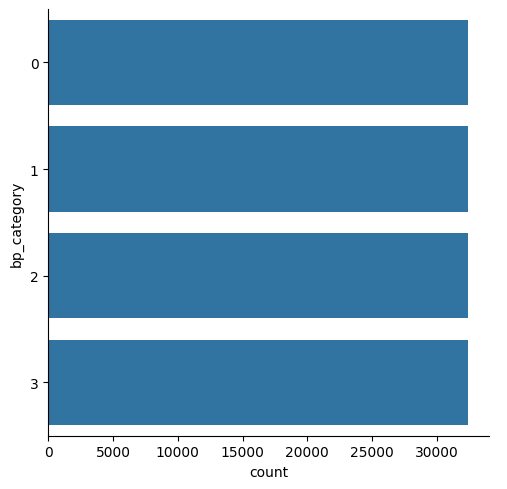

In [ ]:
#Check if everything is already upsampled
display(df_up['bp_category'].value_counts())
sb.catplot(y='bp_category', data = df_up, kind = "count")

bp_category
3    32384
2    32384
0    32384
1    32384
Name: count, dtype: int64
    cholesterol  gluc  smoke  alco  active  cardio  age_years        bmi  \
0             0     0      0     0       1       1         49  27.281746   
1             0     0      0     0       1       1         47  34.105851   
2             0     0      0     0       1       0         51  26.259585   
3             0     0      0     0       1       1         47  25.503616   
4             0     0      0     0       1       0         51  28.934069   
..          ...   ...    ...   ...     ...     ...        ...        ...   
95            0     0      0     0       1       1         63  31.645570   
96            0     0      0     0       1       0         52  27.513385   
97            0     0      0     0       0       1         49  31.833910   
98            0     0      1     1       1       0         59  24.801587   
99            0     0      0     0       1       0         59  27.681661   

    b

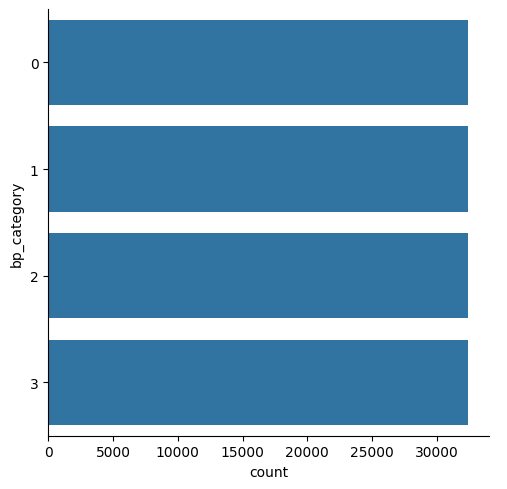

In [ ]:
#Final checking of upsampled Data
print(df_up['bp_category'].value_counts())
sb.catplot(y='bp_category', data=df_up, kind='count')
df_up.to_csv('df_up.csv', index=False)
print(df_up.head(100))

### Upsampling data to match with Hypertension Stage 1 and randomizing all the values will give more of an accurate prediction of how would the machine learning models do in the dataset itself as there will be no biases anymore. Of course, This would cause the classification accuracy to decrease from the original one but that is because of the biases and skewness towards Hypertension Stage 1. Basically, We are not only trying to predict Hypertension Stage 1 but to predict cardiovascular health for each person based on their lifestyle factors.

# Downsampling Data

In [ ]:
#Essentially downsampling other classes to have the same values as the 1st class (Elevated Heart Rate)
hd_0_downsampled = resample(hd_0,
                          replace=True,
                          n_samples=len(hd_1),
                          random_state=1)

hd_2_downsampled = resample(hd_2,
                          replace=True,
                          n_samples=len(hd_1),
                          random_state=1)

hd_3_downsampled = resample(hd_3,
                          replace=True,
                          n_samples=len(hd_1),
                          random_state=1)

#Combine all classes after downsampling
df_down = pd.concat([hd_1] + [hd_0_downsampled, hd_2_downsampled, hd_3_downsampled])

#Randomize the values
df_down = df_down.sample(frac=1, random_state=1).reset_index(drop=True)

In [ ]:
#Making sure no null values in the downsampled dataset itself as it can cause problems
df_down.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cholesterol  9684 non-null   uint8  
 1   gluc         9684 non-null   uint8  
 2   smoke        9684 non-null   uint8  
 3   alco         9684 non-null   uint8  
 4   active       9684 non-null   uint8  
 5   cardio       9684 non-null   uint8  
 6   age_years    9684 non-null   int64  
 7   bmi          9684 non-null   float64
 8   bp_category  9684 non-null   int64  
dtypes: float64(1), int64(2), uint8(6)
memory usage: 283.8 KB


bp_category
0    2421
1    2421
2    2421
3    2421
Name: count, dtype: int64

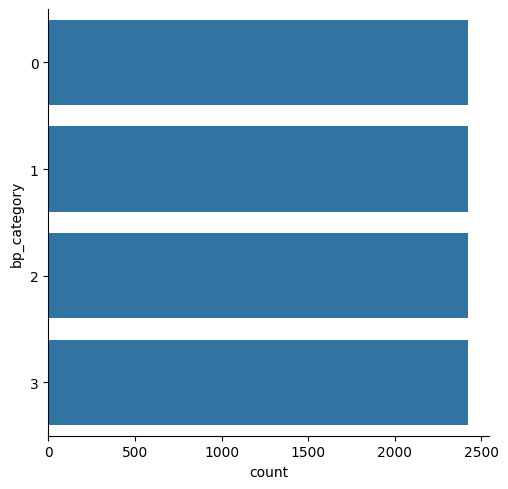

In [ ]:
#Check if everything is already downsampled
display(df_down['bp_category'].value_counts())
sb.catplot(y='bp_category', data = df_down, kind = "count")

bp_category
0    2421
1    2421
2    2421
3    2421
Name: count, dtype: int64
   cholesterol  gluc  smoke  alco  active  cardio  age_years        bmi  \
0            0     0      0     0       1       0         49  24.977043   
1            0     0      0     0       0       0         48  26.218821   
2            0     0      0     0       0       0         49  23.191095   
3            0     0      1     0       1       1         49  33.057851   
4            2     0      0     0       1       1         50  32.488629   

   bp_category  
0            0  
1            1  
2            2  
3            3  
4            3  


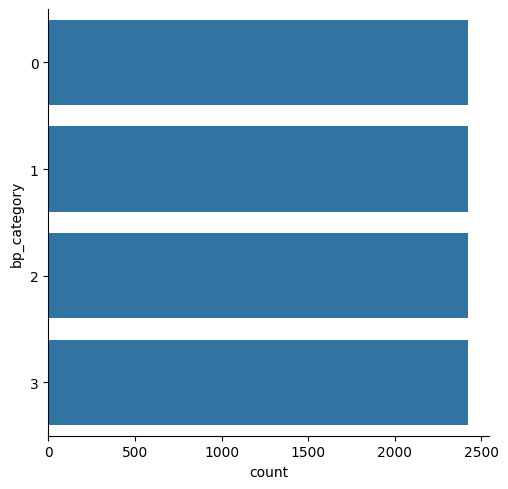

In [ ]:
#Final checking of downsampled data
print(df_down['bp_category'].value_counts())
sb.catplot(y='bp_category', data=df_down, kind='count')
df_down.to_csv('df_down.csv', index=False)
print(df_down.head())

### Essentially, We are doing the same with the downsampled dataset and We downsampled it down to the amount of people who has an elevated heart rate. This is done for comparing between the accuracy and prediction that will be done between the upsampled and downsampled data. At the end of predicting using machine learning models, we will find out which will be the best dataset to use. 